In [1]:
#실습1 p.142

In [2]:
# step1. 분석 구분별 간단한 분석 시나리오/가설정의
# 가설 1. 여성이 남성보다 혈당산소요구량이 더 높다. 
# 가설 2. 나이가 어릴수록 혈당산소요구량이 더 높다. 

In [3]:
# step2. 가설별 분석 기법 매핑, 담당자, 일정 계획

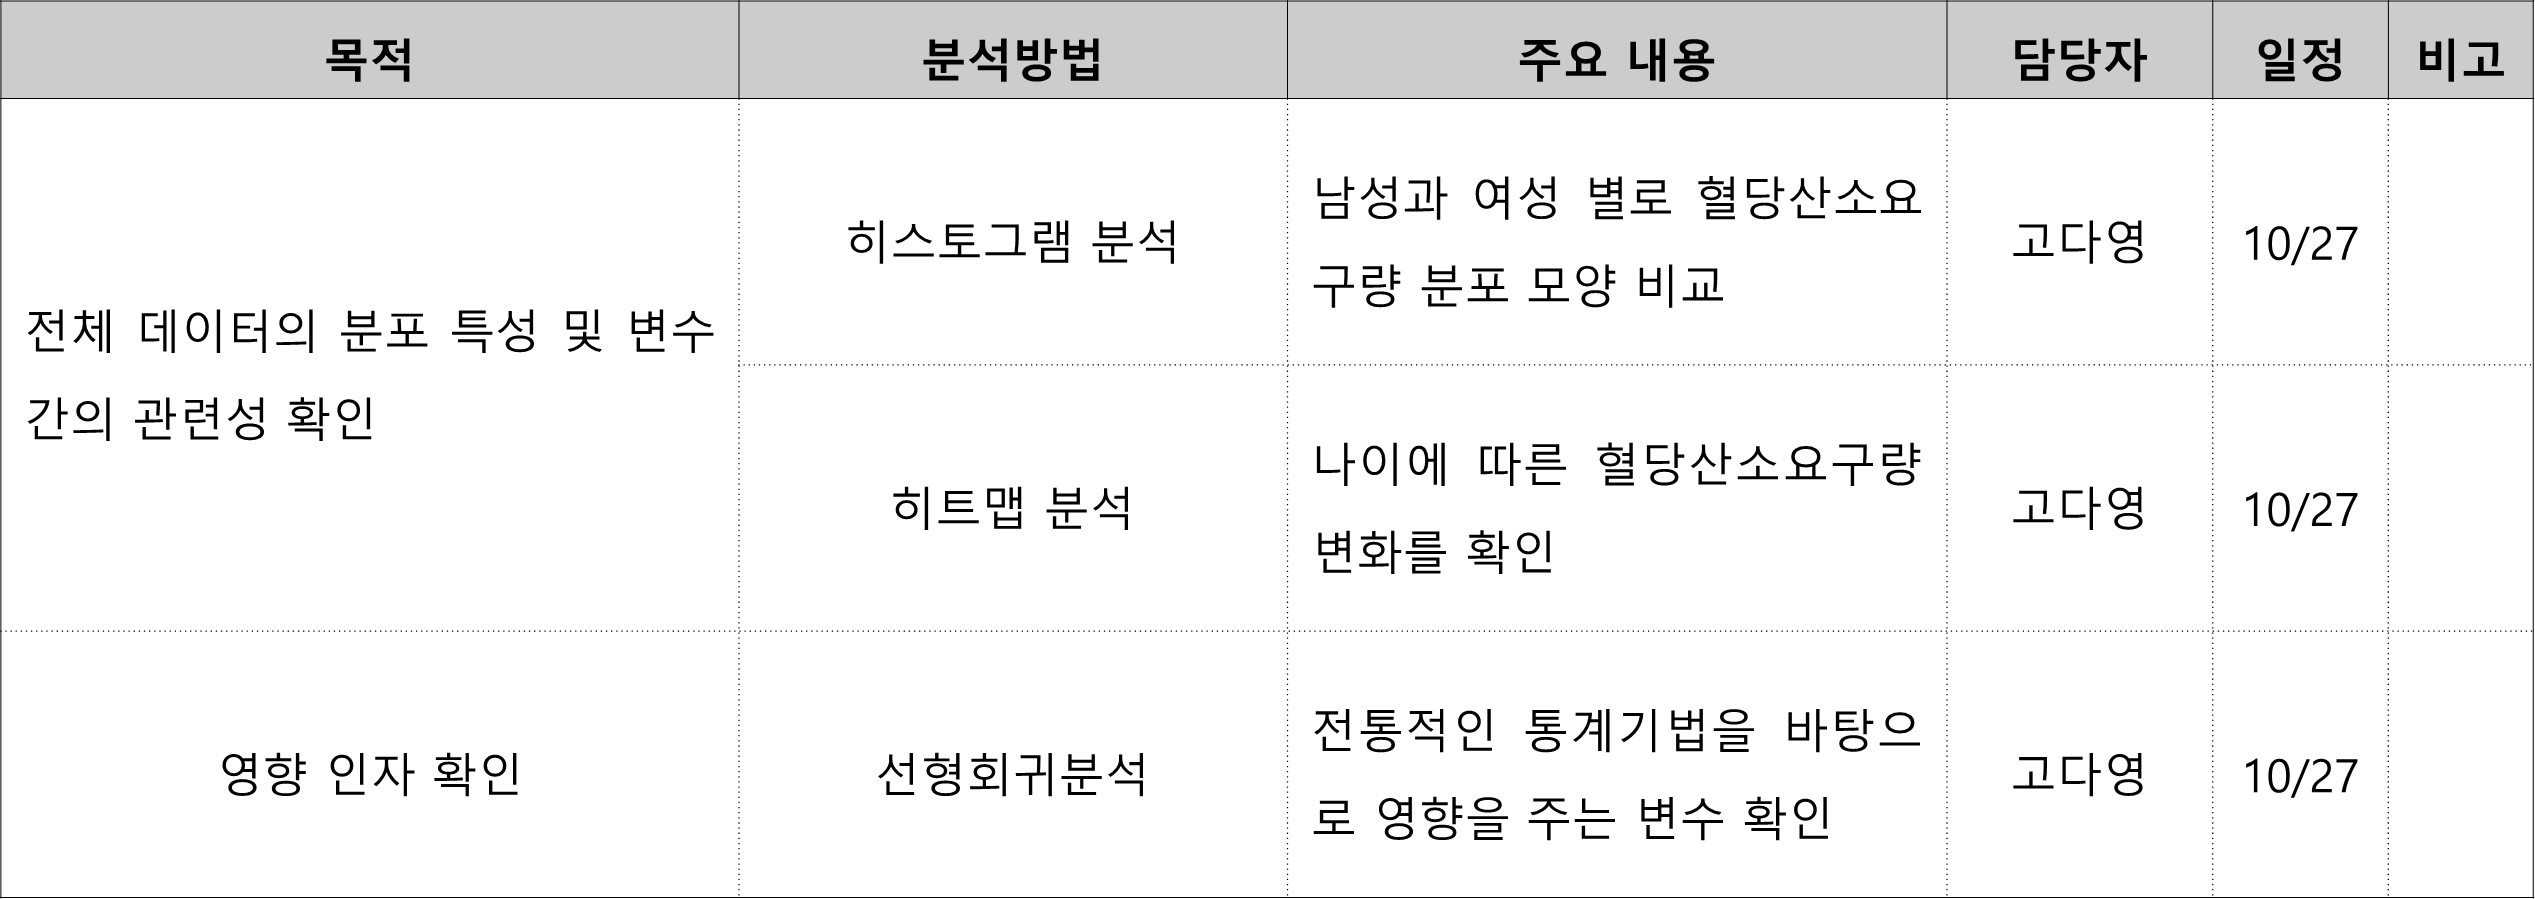

In [4]:
# step3. 분석 계획의 타당성 검토
# 목적, 분석방법, 내용이 동일성이 있으며 위의 가설을 검정하는데 타당하다고 판단됨. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus']=False

In [5]:
#실습2 p.192
# step1. 데이터 속성 및 기술통계량 확인
#titanic.csv 데이터 불러오기
df=pd.read_csv("C:/python/1 Big Data 분석 기초/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#PassengerId, Name, Ticket, Cabin은 분석에 필요한 변수들이 아니므로 제거
df1=df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [7]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df1.shape #변수 8, 총 자료 891개

(891, 8)

In [9]:
df1.info()  #데이터 속성 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
df1.describe() #데이터 기술 통계량 확인

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df1.describe(include='all') #문자형 변수를 포함하여 전체 통계량 확인

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.758889,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,13.002570,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,30.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


<AxesSubplot:>

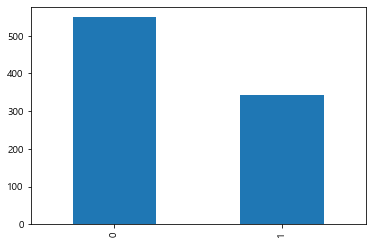

In [12]:
#Step2. 목표변수 및 설명변수(범주형/연속형 변수별)의 분포 확인
# 범주형 변수 : Survived, Pclass, Sex, SibSp, Parch, Embarked
# 연속형 변수 : Age, Fare

#목표 변수 - Survived 분포 확인 (범주형 변수이므로 bar chart로 확인)
df1['Survived'].value_counts().plot.bar()
#생존여부 분포 확인 결과 0이 1보다 많음 - 생존자보다 사망자가 더 많다. 

<AxesSubplot:>

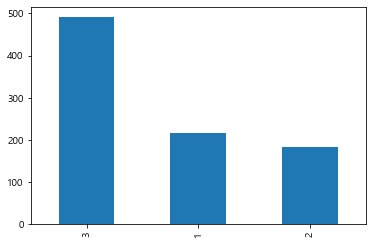

In [13]:
df1['Pclass'].value_counts().plot.bar() 
# 설명변수 - Pclass (범주형 변수이므로 bar chart로 확인)
# 확인 결과, 3등석>1등석>2등석 순으로 많음

<AxesSubplot:>

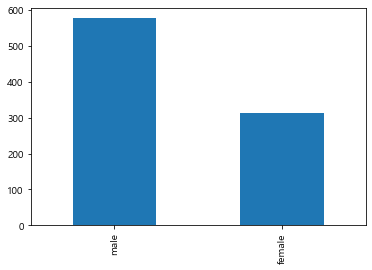

In [14]:
df1['Sex'].value_counts().plot.bar() 
# 설명변수 - Sex (범주형 변수이므로 bar chart로 확인)
# 확인 결과, 남성이 여성보다 많음

<AxesSubplot:>

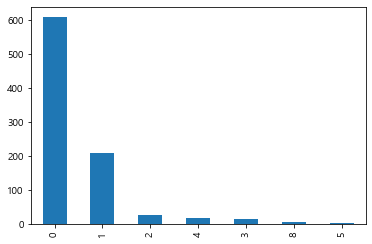

In [15]:
# 설명변수 - SibSp (범주형 변수이므로 bar chart로 확인)
df1['SibSp'].value_counts().plot.bar() #확인 결과, 홀로 탄 승객이 가장 많음

<AxesSubplot:>

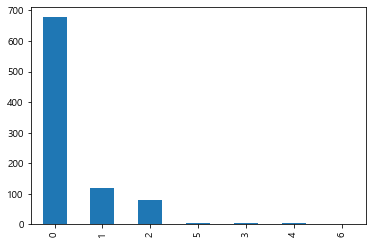

In [16]:
# 설명변수 - Parch (범주형 변수이므로 bar chart로 확인)
df1['Parch'].value_counts().plot.bar() #확인 결과, 홀로 탄 승객이 가장 많음

<AxesSubplot:>

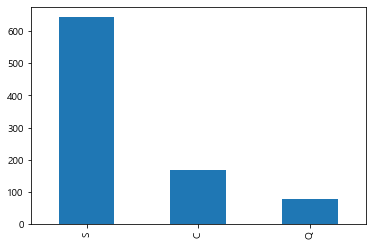

In [17]:
# 설명변수 - Embarked(범주형 변수이므로 bar chart로 확인)
df1['Embarked'].value_counts().plot.bar() #확인 결과, Southampton에서 탄 승객이 가장 많음

(array([ 40.,  14.,  15.,  31.,  79.,  98.,  85., 261.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

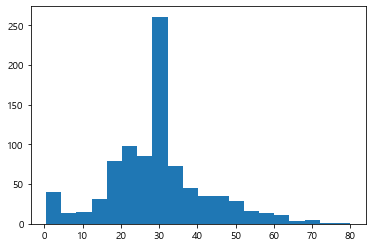

In [18]:
#Age와 Fare은 연속형 변수이므로 histogram으로 확인
#확인 결과, 30대 승객이 가장 많음
plt.hist(x='Age', data=df1, bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

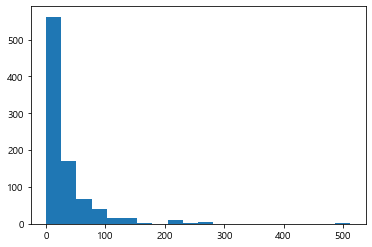

In [19]:
#확인 결과 0~100 파운드가 가장 많음
plt.hist(x='Fare', data=df1, bins=20)

In [20]:
#Step3. 변수들의 결측 및 이상치 처리
df1.isnull().sum()
#embarked에서 2개의 결측치 발견

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [21]:
df1[df1['Embarked'].isnull()] #Embarked에 결측치 있는 행 출력

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [22]:
#결측값이 포함된 행 지우기
df1.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9988\3635148167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [23]:
#결측값이 포함된 2개 행 제거 후, 자료수 889개 확인. 
df1.shape

(889, 8)

In [24]:
df1.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889,889.000000,889.000000,889.000000,889.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.382452,2.311586,NaN,29.713352,0.524184,0.382452,32.096681,NaN
std,0.486260,0.834700,NaN,12.969135,1.103705,0.806761,49.697504,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,3.000000,NaN,30.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


In [25]:
#기술통계량과 위의 분포 그래프를 통해 확인 결과 이상치 크게 발견할 수 없음. 
# 범주형 변수들은 범주 외의 값은 나타나지 않았으며 연속형 변수인 Age와 Fare의 경우 Age에서는 이상치를 발견할 수 없었으며, 
# Fare의 경우 512파운드가 이상치로 보이기도 하지만 이전에 300~500 사이의 값도 존재하는 것으로 보아 무조건 이상치로 판단하고 삭제할 수 없음
# 따라서 이상치 제거 없이 분석 진행. 

In [26]:
#Step4. 그래프 분석을 통해 변수간 관계를 확인

<AxesSubplot:>

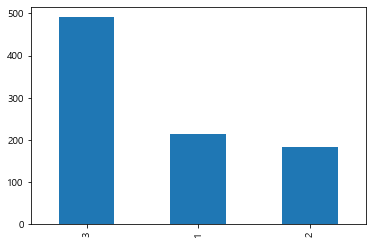

In [27]:
df1['Pclass'].value_counts().plot.bar()

<AxesSubplot:xlabel='Pclass,Survived'>

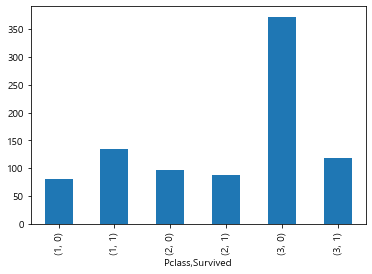

In [28]:
df1_group1=df1.groupby(['Pclass', 'Survived']).size()
df1_group1.plot.bar()

In [29]:
# Pclass와 Survived 모두 범주형 변수이므로 bar plot을 사용
# Pclass 분포를 보면 3등석>1등석>2등석 순으로 많은데, 
# 사망자수는 3등석이 압도적으로 많으며 생존자수는 1등석, 2등석, 3등석 모두 비슷한 것으로 나타남
# 따라서 승객 등급이 생존여부에 영향을 미쳤을 것으로 판단할 수 있음. 

<AxesSubplot:>

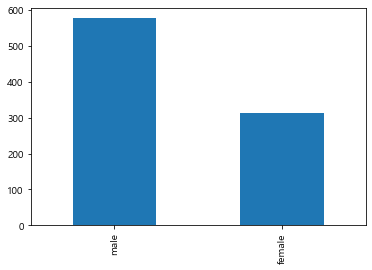

In [30]:
df1['Sex'].value_counts().plot.bar() 

<AxesSubplot:xlabel='Survived,Sex'>

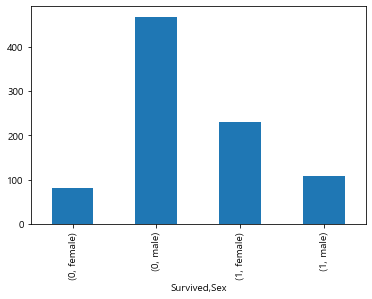

In [31]:
df1_group2=df1.groupby(['Survived', 'Sex']).size()
df1_group2.plot.bar()

In [32]:
# 성별 분포 결과를 확인해보면 남성이 여성보다 많지만
# 성별에 따른 생존여부를 분석한 결과, 사망자는 남성이 압도적으로 많으며 여성이 더 많이 생존한 것으로 보아
# 성별이 생존여부에 영향을 미쳤을 것으로 판단할 수 있음.

<AxesSubplot:>

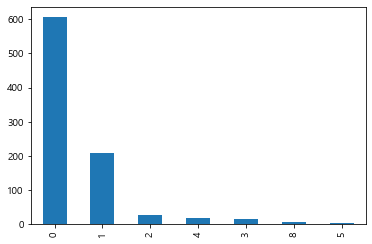

In [33]:
df1['SibSp'].value_counts().plot.bar()

<AxesSubplot:xlabel='Survived,SibSp'>

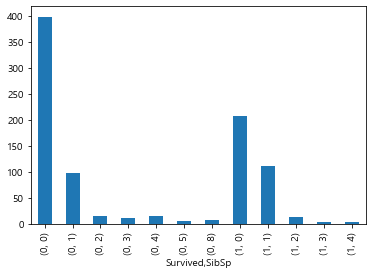

In [34]:
df1_group3=df1.groupby(['Survived', 'SibSp']).size()
df1_group3.plot.bar()

<AxesSubplot:>

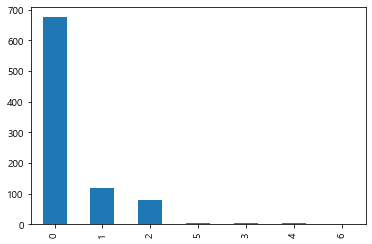

In [35]:
df1['Parch'].value_counts().plot.bar()

<AxesSubplot:xlabel='Survived,Parch'>

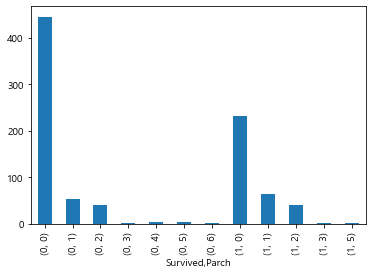

In [36]:
df1_group4=df1.groupby(['Survived', 'Parch']).size()
df1_group4.plot.bar()

In [37]:
# 함께 탐승한 형제수와 자녀수를 분석한 결과 혼자 탑승한 사람이 가장 많으며
# 생존여부와 함께 분석한 결과 마찬가지로 혼자 탑승한 사람이 가장 많이 생존하고 사망한 것으로 나타남
# 따라서 함께 탑승한 형제수와 자녀수는 생존여부에 영향을 미치는 인자가 아님. 

<AxesSubplot:>

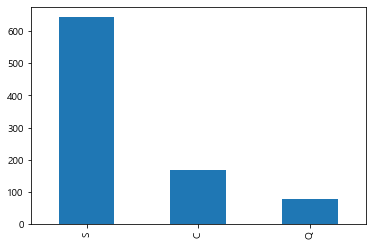

In [38]:
df1['Embarked'].value_counts().plot.bar()

<AxesSubplot:xlabel='Survived,Embarked'>

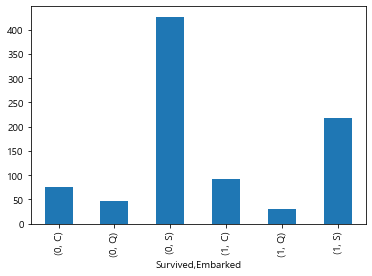

In [39]:
df1_group5=df1.groupby(['Survived', 'Embarked']).size()
df1_group5.plot.bar()

In [40]:
# 승객이 탑승한 곳을 분석한 결과, Southampton에서 가장 많았으며 순서대로 Cherbourg, Queenstown 순임
# 생존여부와 함께 분석한 결과, 마찬가지로 Southampton에서 탑승한 승객이 가장 많이 사망하고 생존하였으며 순차적으로 Cherbourg, Queenstown인 것으로 나타남.
# 따라서 승객이 탑승한 곳은 생존여부에 영향을 미치지 않음. 

(array([ 40.,  14.,  15.,  31.,  79.,  98.,  85., 261.,  73.,  44.,  35.,
         35.,  29.,  16.,  13.,  10.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

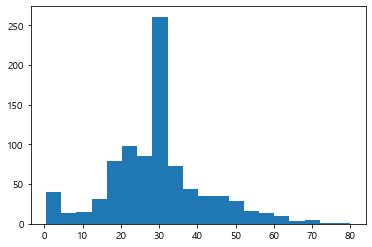

In [41]:
plt.hist(x='Age', data=df1, bins=20)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

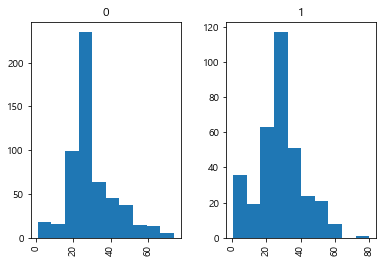

In [42]:
df1.hist(column='Age', by='Survived')

In [43]:
# 나이 분포는 30대가 가장 많으며 생존여부와 분석 결과 마찬가지로 30대 승객이 가장 많이 생존하고 사망하였으며 
# 나이 분포 그래프와 유사하게 나타났으므로 크게 영향을 미치는 인자는 아님
# 다만 0~10세의 경우 사망자보다 생존자가 두드러지게 많은 것으로 나타나 나이 자체가 생존에 크게 영향을 미치는 것은 아니나,
# 0~10세의 경우에는 나이가 생존에 영향을 미쳤을 수도 있다고 생각할 수 있음. 

(array([562., 170.,  67.,  37.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

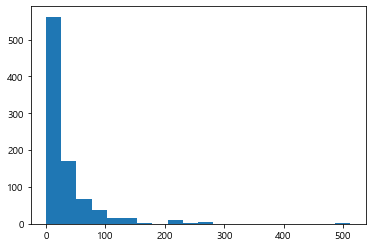

In [44]:
plt.hist(x='Fare', data=df1, bins=20)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

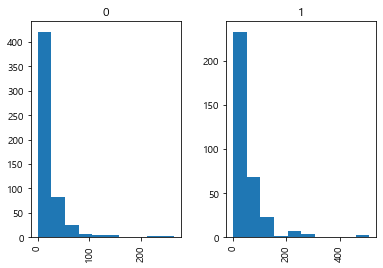

In [45]:
df1.hist(column='Fare', by='Survived')

In [46]:
#티켓 요금 분포 그래프 양상과 생존여부에 따른 분석 결과 분포 양상이 거의 비슷하므로
# 티켓 요금은 생존여부에 크게 영향을 미치는 인자가 아님을 확인할 수 있음.

In [47]:
# 따라서 Titanic 데이터 분석 결과, 성별(Sex)과 승객 등급(Pclass)이 생존여부에 가장 크게 영향을 미치는 인자임을 확인하였음. 

In [54]:
df_age=df1.groupby(['Survived', 'Sex'], as_index=False).size()

In [57]:
df_pivot=df_age.pivot("Sex", "Survived")

<AxesSubplot:xlabel='None-Survived', ylabel='Sex'>

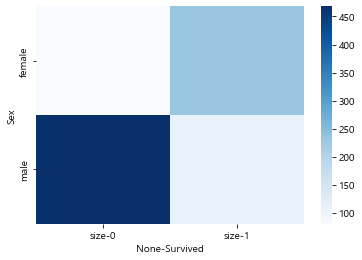

In [58]:
sns.heatmap(df_pivot, cmap="Blues") #남성이 여성보다 많으나 사망자수는 압도적으로 많음. 

In [59]:
df_pclass=df1.groupby(['Survived', 'Pclass'], as_index=False).size()

In [60]:
df_pivot=df_pclass.pivot("Pclass", "Survived")

<AxesSubplot:xlabel='None-Survived', ylabel='Pclass'>

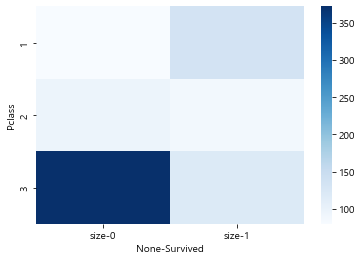

In [61]:
sns.heatmap(df_pivot, cmap="Blues")
# 다른 3등석 승객 중 사망자가 압도적으로 많음. 

In [58]:
#실습3 p.211

In [59]:
ds_mycars=pd.read_csv("C:/python/1 Big Data 분석 기초/mycars.csv")

In [60]:
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [61]:
# 시내에서 연비 통계치 : 구동방식별 데이터수, 평균, 중앙값, 표준편차, min, max, Q1, Q3
df_mycars1=ds_mycars[['automatic', 'mpg']]
df_mycars1.groupby('automatic').describe()

mpg                                                  
           count       mean       std  min   25%   50%   75%   max
automatic                                                         
auto       157.0  15.968153  3.848777  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675325  4.488118  9.0  15.0  18.0  21.0  35.0

In [62]:
# 구동방식이 auto가 manual보다 더 많으나 전반적으로 manual한 방식이 연비가 더 높게 나타남(평균이나 중앙값 등을 통해 확인 가능)

In [64]:
# 고속도로에서 연비 통계치 : 구동방식별 데이터수, 평균, 중앙값, 표준편차, min, max, Q1, Q3
df_mycars2=ds_mycars[['automatic', 'highway_mileage']]
df_mycars2.groupby('automatic').describe()

highway_mileage                                                   
                    count       mean       std   min   25%   50%   75%   max
automatic                                                                   
auto                157.0  22.292994  5.623054  12.0  17.0  22.0  26.0  41.0
manual               77.0  25.779221  5.961772  12.0  23.0  26.0  29.0  44.0

In [65]:
# 구동방식이 auto가 manual보다 많으나, 평균이나 중앙값 등을 확인 결과 manual한 방식이 고속도로에서 연비가 더 높게 나타남. 

In [ ]:
#실습4 p.213

In [66]:
df_mycars3=ds_mycars[['model', 'automatic']]

In [67]:
df_mycars3.head()

,model,automatic
0,a4,auto
1,a4,manual
2,a4,manual
3,a4,auto
4,a4,auto


In [68]:
count=df_mycars3['model'].value_counts().sort_index()

In [69]:
cumcnt = np.cumsum(count)

In [70]:
percent=count/sum(count) * 100

In [71]:
cumpct=np.cumsum(percent)

In [72]:
count_data=pd.DataFrame({'Count':count, 'Cumcnt':cumcnt, 'Percent':percent, 'Cumpct': cumpct})

In [73]:
count_data.columns.name='Model'

In [74]:
#모델에 대한 counts, cumulative counts, percents, cumulative percents
count_data.round(2)

Model,Count,Cumcnt,Percent,Cumpct
4runner 4wd,6,6,2.56,2.56
a4,7,13,2.99,5.56
a4 quattro,8,21,3.42,8.97
a6 quattro,3,24,1.28,10.26
altima,6,30,2.56,12.82
c1500 suburban 2wd,5,35,2.14,14.96
camry,7,42,2.99,17.95
camry solara,7,49,2.99,20.94
caravan 2wd,11,60,4.70,25.64
civic,9,69,3.85,29.49


In [75]:
# caravan 2wd가 가장 많은 것을 확인

In [76]:
count2=df_mycars3['automatic'].value_counts().sort_index()

In [77]:
cumcnt2 = np.cumsum(count2)

In [78]:
percent2=count2/sum(count2) * 100

In [79]:
cumpct2=np.cumsum(percent2)

In [80]:
count_data2=pd.DataFrame({'Count':count2, 'Cumcnt':cumcnt2, 'Percent':percent2, 'Cumpct': cumpct2})

In [81]:
count_data2.columns.name='Automatic'

In [82]:
# 구동방식에 대한 counts, cumulative counts, percents, cumulative percents
count_data2.round(2)

Automatic,Count,Cumcnt,Percent,Cumpct
auto,157,157,67.09,67.09
manual,77,234,32.91,100.00


In [83]:
# auto가 manual 보다 많음

In [84]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [85]:
#실습5 p.226 <정규분포>
mu=175
sigma=5
x=180

In [87]:
prob=stats.norm.cdf(x,mu,sigma)
print("나의 키가 {}cm일 경우에 {:.1f}%에 위치함".format(x,(1-prob)*100))


나의 키가 180cm일 경우에 15.9%에 위치함


In [88]:
# 대한민국 남성 20~30대 키를 측정한 결과, 평균 175cm, 표준편차 5cm이였으므로 나의 키가 180cm일 경우 상위 15.9%에 위치함.

In [91]:
#실습6 p.228 <정규분포>
#1) 9km 이상 15km이하를 달릴 확률
mu=12
sigma=3
x1=9
prob1=stats.norm.cdf(x1, mu, sigma) #누적확률 9km이하일 확률

In [92]:
x2=15
prob2=stats.norm.cdf(x2,mu, sigma) #누적확률 15km이하일 확률

In [93]:
print("{}km이상 {}이하를 달릴 확률 : {:.3f}%".format(x1, x2, (prob2-prob1)*100)) 
#15km이하일 확률에서 9km이하일 확률을 뺴면 9km이상 15km일 확률을 구할 수 있음. 

9km이상 15이하를 달릴 확률 : 68.269%


In [95]:
#15km 이상 달릴 확률
print("{}km이상 달릴 확률 : {:.3f}%".format(x2, (1-prob2)*100))
#15km이하를 달릴 확률을 구했으므로 전체확률에서 빼면 됨.

15km이상 달릴 확률 : 15.866%


In [111]:
#실습7 p.236 <t-분포>
t=2
df=100
prob=stats.t.cdf(t,df)
print("P(T<={}) : {:.3f}".format(t,prob))

P(T<=2) : 0.976


In [112]:
# t분포에서 자유도 100일때 2.0 이하일 확률은 97.589%

In [113]:
# t분포는 적은 data로 차이를 검정하기 위한 방법으로 0을 중심으로 좌우대칭, 또한 자유도가 클수록 정규분포에 가까워짐.

In [114]:
#실습8 p.239 <카이제곱분포>
chisq=3
df=8
prob=stats.chi2.cdf(chisq, df)
print("P(X<={}) : {:.3f}".format(chisq, prob))

P(X<=3) : 0.066


In [115]:
# 카이제곱분포에서 자유도가 8일 때 카이제곱값이 3.0이하일 확률은 6.564%

In [116]:
# 카이제곱분포는 표본분산들의 분포를 나타냄. 여러 집단간의 독립성/ 동질성을 검정하는데 쓰이며 카이제.곱.이므로 0이상의 값만 나타남. 

In [118]:
#실습9 p,243 <F분포>
f=1.5
dfnum=10
dfden=100
prob=stats.f.cdf(x=f, dfn=dfnum, dfd=dfden)
print("P(X<={}) : {:.3f}".format(f,prob))

P(X<=1.5) : 0.850


In [119]:
# F분포에서 자유도가 10,100일 때 F값이 1.5이하일 확률은 84.957%

In [120]:
# F분포는 표본분산의 비율들의 표본분포. 두 분산을 비교하는데 활용됨. 

In [110]:
#실습10 p.250 <이항 분포>
n=5 
for i in range(n+1) :
    prob=stats.binom.pmf(k=i, n=n, p=0.3)
    print("P(X={}) = {:.3f}".format(i, prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


In [121]:
# 불량대수가 0,1,2,3,4,5대가 나올 확률은 각각 0.168, 0.360, 0.309, 0.132, 0.028, 0.002
# 이항분포는 베르누이 시행을 n번 했을 때 성공/실패가 나올 확률을 나타냄
# 불량대수가 5대가 나올 확률은 현저히 적은 것을 알 수 있음. 